Saving vgsales.csv to vgsales.csv


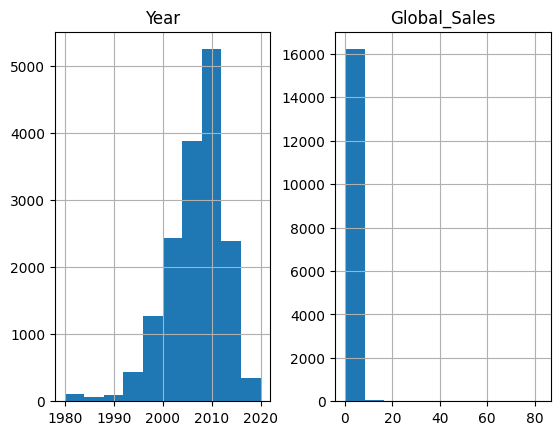

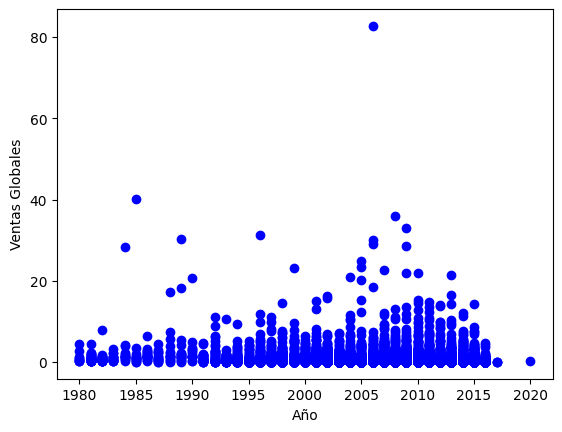

Coeficiente: [[-0.02091958]]
Intersección: [42.50602432]


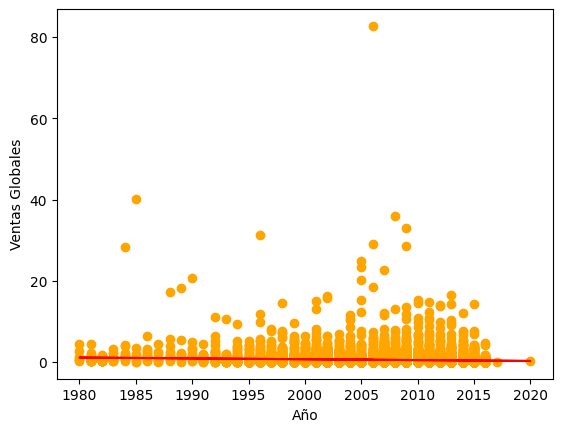

Error cuadrático medio: 0.61
Suma cuadrática: 2.43
R2: 0.00


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score

# Cargar los datos desde un archivo CSV (asegúrate de haber cargado el archivo previamente)
from google.colab import files
import io

# Subir el archivo CSV desde tu computadora
uploaded = files.upload()

# Verificar los nombres de los archivos cargados
filename = list(uploaded.keys())[0]  # Obtener el primer archivo cargado

# Leer el archivo CSV
dato = pd.read_csv(io.BytesIO(uploaded[filename]), on_bad_lines='skip')

# Eliminar filas con datos faltantes o erróneos
dato = dato.replace("N/A", np.nan)
dato = dato.dropna()

# Convertir las columnas numéricas a tipo float
dato[['Year', 'Global_Sales']] = dato[['Year', 'Global_Sales']].astype(float)

# Seleccionar características
cda = dato[['Year', 'Global_Sales']]

# Gráficos de las características antes de la limpieza
viz = cda[['Year', 'Global_Sales']]
viz.hist()
plt.show()

# Gráfico año vs ventas globales antes de la limpieza
plt.scatter(cda.Year, cda.Global_Sales, color='blue')
plt.xlabel("Año")
plt.ylabel("Ventas Globales")
plt.show()

# Máscara para seleccionar el 80% de los datos al azar para el entrenamiento
msk = np.random.rand(len(dato)) < 0.8
entreno = cda[msk]
test = cda[~msk]

# Modelar los datos en una regresión lineal
regr = linear_model.LinearRegression()
entre_x = np.asanyarray(entreno[['Year']])
entre_y = np.asanyarray(entreno[['Global_Sales']])
regr.fit(entre_x, entre_y)

# Pendiente e intersección
print("Coeficiente:", regr.coef_)  # Mostramos theta
print("Intersección:", regr.intercept_)

# Mostrar la línea de ajuste lineal
plt.scatter(entreno.Year, entreno.Global_Sales, color='orange')
plt.plot(entre_x, regr.coef_[0][0] * entre_x + regr.intercept_[0], '-r')
plt.xlabel("Año")
plt.ylabel("Ventas Globales")
plt.show()

# Evaluar el modelo utilizando el error cuadrático medio
test_x = np.asanyarray(test[['Year']])
test_y = np.asanyarray(test[['Global_Sales']])
testeo = regr.predict(test_x)

# Imprimir métricas
print("Error cuadrático medio: %.2f" % np.mean(np.absolute(testeo - test_y)))
print("Suma cuadrática: %.2f" % np.mean((testeo - test_y) ** 2))
print("R2: %.2f" % r2_score(test_y, testeo))

